In [27]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [28]:
# setting

start = '2000'
end = '2020'
symbol = 'AAPL'

In [29]:
# load data

data = pd.read_csv(f"Data/DWJ_download/{symbol}.csv", index_col = 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [30]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
       '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-20'],
      dtype='object', name='Date', length=10887)

In [31]:
# set index data type from object to datetime

data.set_index(pd.to_datetime(data.index), inplace = True)
data = data[start:end]
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [32]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514481,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146667,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360504,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231903,96452100
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.221085,99116600


In [33]:
# rescale data from daily to monthly

data = data.resample('M').last() # last is the last date of each month
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,0.901786,0.927455,0.843750,0.926339,0.784238,701680000
2000-02-29,1.013951,1.046875,1.005022,1.023438,0.866442,368961600
2000-03-31,1.137835,1.225446,1.125000,1.212612,1.026597,404633600
2000-04-30,1.135045,1.138393,1.083147,1.107701,0.937779,249580800
2000-05-31,0.775670,0.814732,0.748326,0.750000,0.634950,433507200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,126.420853,225702700
2020-09-30,113.790001,117.260002,113.620003,115.809998,113.459404,142675200
2020-10-31,111.059998,111.989998,107.720001,108.860001,106.650459,190272600


In [34]:
# study only 1 column first

df = data['Adj Close']
df.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: Adj Close, dtype: float64

In [35]:
df_train = data['Adj Close'][:'2017']
df_train.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: Adj Close, dtype: float64

In [36]:
df_train.tail()

Date
2017-08-31    38.582081
2017-09-30    36.257744
2017-10-31    39.767773
2017-11-30    40.574184
2017-12-31    39.955593
Freq: M, Name: Adj Close, dtype: float64

In [37]:
df_test = data['Adj Close']['2018':]
df_test.head()

Date
2018-01-31    39.530609
2018-02-28    42.225998
2018-03-31    39.774757
2018-04-30    39.177341
2018-05-31    44.471138
Freq: M, Name: Adj Close, dtype: float64

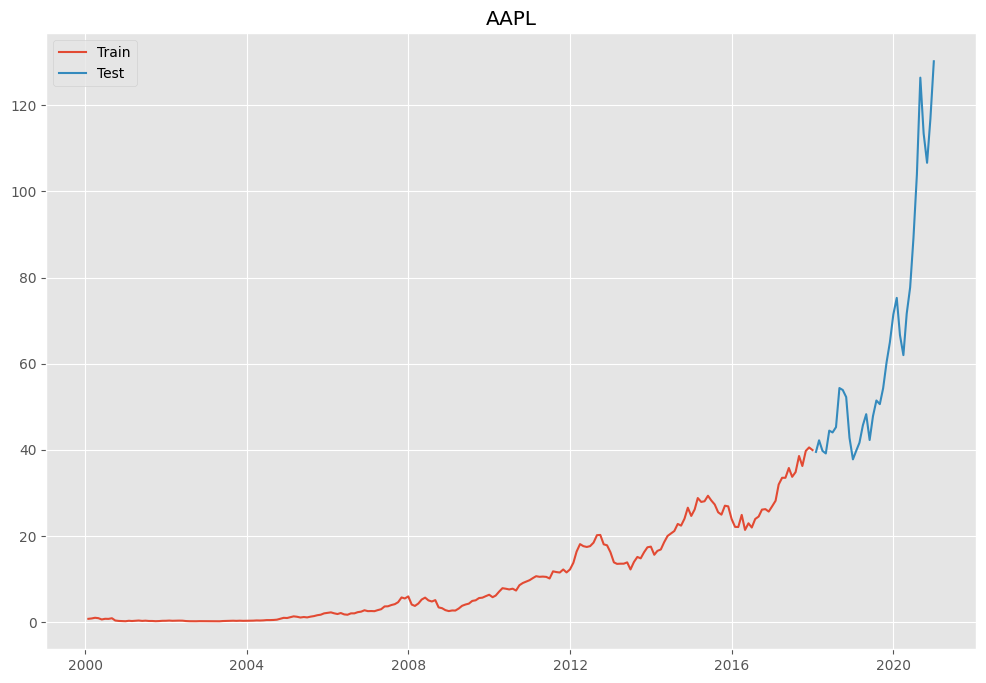

In [38]:
# plot

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = 'Train')
plt.plot(df_test, label = 'Test')

plt.legend()
plt.title(f'{symbol}');

### Simple Exponential Smoothing

https://towardsdatascience.com/simple-exponential-smoothing-749fc5631bed


### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t\end{split}$

In [39]:
# load a library

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [40]:
ses02 = SimpleExpSmoothing(df_train, initialization_method = 'estimated').fit(0.2)
ses09 = SimpleExpSmoothing(df_train, initialization_method = 'estimated').fit(0.9)

In [41]:
ses02, ses09

(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x1571fc0a0>,
 <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x1570f1a60>)

In [42]:
ses02.fittedvalues

Date
2000-01-31     0.757644
2000-02-29     0.762963
2000-03-31     0.783659
2000-04-30     0.832246
2000-05-31     0.853353
                ...    
2017-08-31    32.001107
2017-09-30    33.317302
2017-10-31    33.905390
2017-11-30    35.077867
2017-12-31    36.177130
Freq: M, Length: 216, dtype: float64

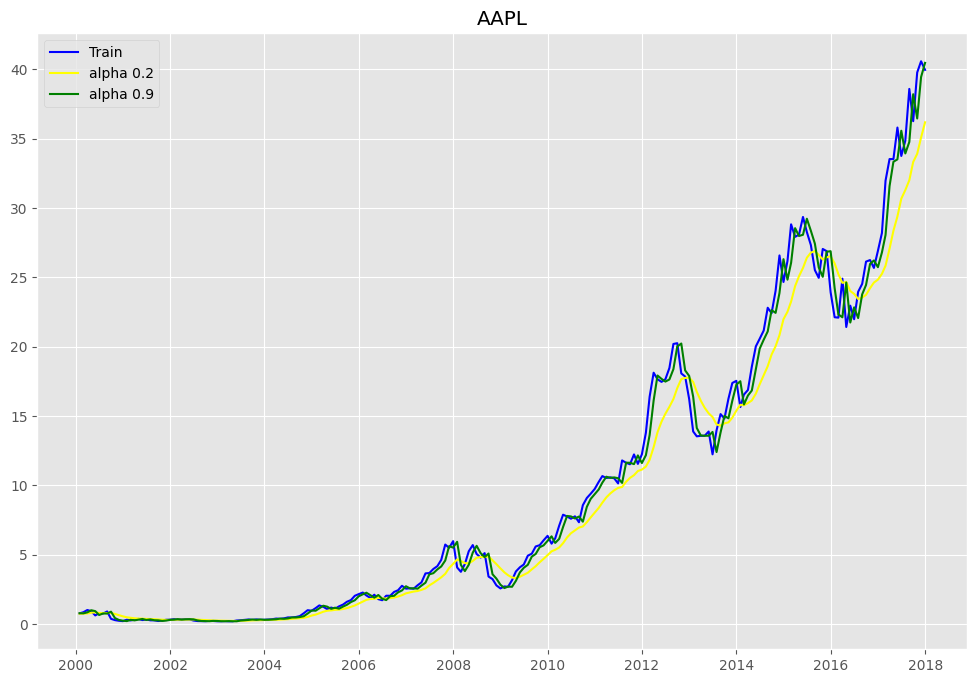

In [43]:
# plot to compare

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = "Train", color = 'blue')
plt.plot(ses02.fittedvalues, label = "alpha 0.2", color = 'yellow')
plt.plot(ses09.fittedvalues, label = "alpha 0.9", color = 'green')

plt.title(f"{symbol}")
plt.legend()
plt.show()

### Do a prediction

In [44]:
df_test.shape

(36,)

In [45]:
pred02 = ses02.forecast(df_test.shape[0]) # forcast per the df_test's length
pred09 = ses09.forecast(df_test.shape[0])
pred02, pred09

(2018-01-31    36.932823
 2018-02-28    36.932823
 2018-03-31    36.932823
 2018-04-30    36.932823
 2018-05-31    36.932823
 2018-06-30    36.932823
 2018-07-31    36.932823
 2018-08-31    36.932823
 2018-09-30    36.932823
 2018-10-31    36.932823
 2018-11-30    36.932823
 2018-12-31    36.932823
 2019-01-31    36.932823
 2019-02-28    36.932823
 2019-03-31    36.932823
 2019-04-30    36.932823
 2019-05-31    36.932823
 2019-06-30    36.932823
 2019-07-31    36.932823
 2019-08-31    36.932823
 2019-09-30    36.932823
 2019-10-31    36.932823
 2019-11-30    36.932823
 2019-12-31    36.932823
 2020-01-31    36.932823
 2020-02-29    36.932823
 2020-03-31    36.932823
 2020-04-30    36.932823
 2020-05-31    36.932823
 2020-06-30    36.932823
 2020-07-31    36.932823
 2020-08-31    36.932823
 2020-09-30    36.932823
 2020-10-31    36.932823
 2020-11-30    36.932823
 2020-12-31    36.932823
 Freq: M, dtype: float64,
 2018-01-31    40.006072
 2018-02-28    40.006072
 2018-03-31    40.006072

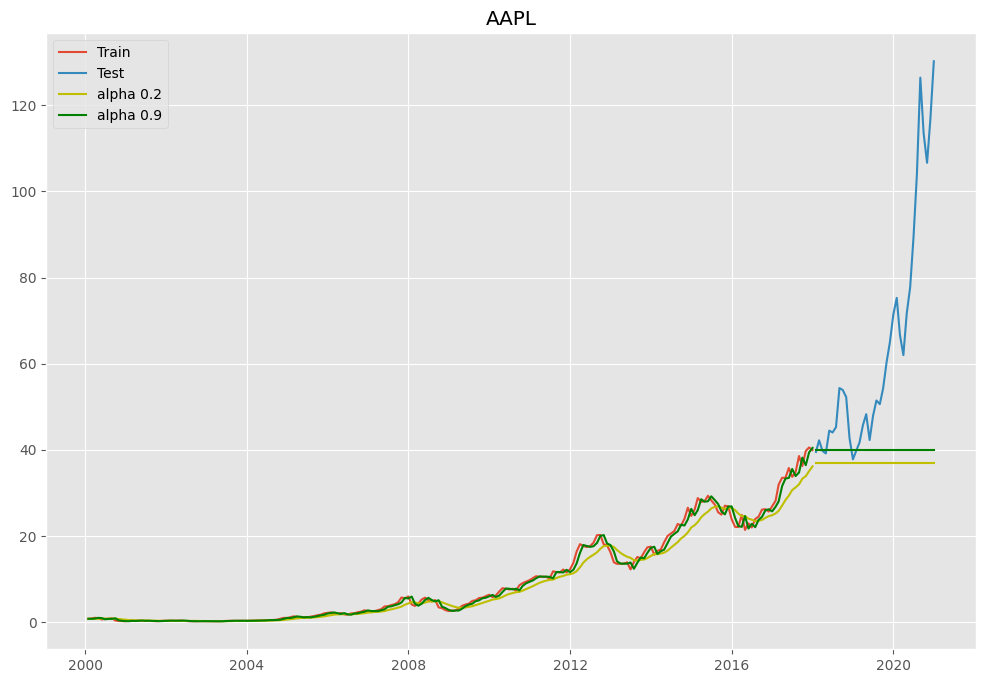

In [46]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = "Train")
plt.plot(df_test, label = "Test")

plt.plot(ses02.fittedvalues, color = "y", label = "alpha 0.2")
plt.plot(ses09.fittedvalues, color = "g", label = "alpha 0.9")
plt.plot(pred02, color = "y")
plt.plot(pred09, color = "g")

plt.title(f"{symbol}")
plt.legend()
plt.show()

### Holt Linear Trend, Holt-Winter's Model with Exponential Trend

- Level Equation
    - High alpha : interest today price
    - Low aplha : interest the history price
    - bt : Today's price
    - bt-1 : trend data of the past day

- Trend Equation
    - High beta : interest price of recently trend (trend is the change of level lt - lt-1)
    - Low beta : interest the history price

In [47]:
from statsmodels.tsa.api import Holt

In [50]:
holt = Holt(df_train, initialization_method = "estimated").fit() # use default setting to fit/train
holt

In [51]:
df_test.head()

Date
2018-01-31    39.530609
2018-02-28    42.225998
2018-03-31    39.774757
2018-04-30    39.177341
2018-05-31    44.471138
Freq: M, Name: Adj Close, dtype: float64

In [52]:
df_test.shape

(36,)

In [54]:
df_test.shape[0]

36

In [55]:
holt_pred = holt.forecast(df_test.shape[0])
holt_pred

2018-01-31    40.399182
2018-02-28    40.791277
2018-03-31    41.183372
2018-04-30    41.575467
2018-05-31    41.967562
2018-06-30    42.359657
2018-07-31    42.751752
2018-08-31    43.143847
2018-09-30    43.535942
2018-10-31    43.928037
2018-11-30    44.320132
2018-12-31    44.712228
2019-01-31    45.104323
2019-02-28    45.496418
2019-03-31    45.888513
2019-04-30    46.280608
2019-05-31    46.672703
2019-06-30    47.064798
2019-07-31    47.456893
2019-08-31    47.848988
2019-09-30    48.241083
2019-10-31    48.633178
2019-11-30    49.025273
2019-12-31    49.417368
2020-01-31    49.809463
2020-02-29    50.201558
2020-03-31    50.593653
2020-04-30    50.985748
2020-05-31    51.377843
2020-06-30    51.769938
2020-07-31    52.162033
2020-08-31    52.554128
2020-09-30    52.946223
2020-10-31    53.338318
2020-11-30    53.730413
2020-12-31    54.122508
Freq: M, dtype: float64

[]

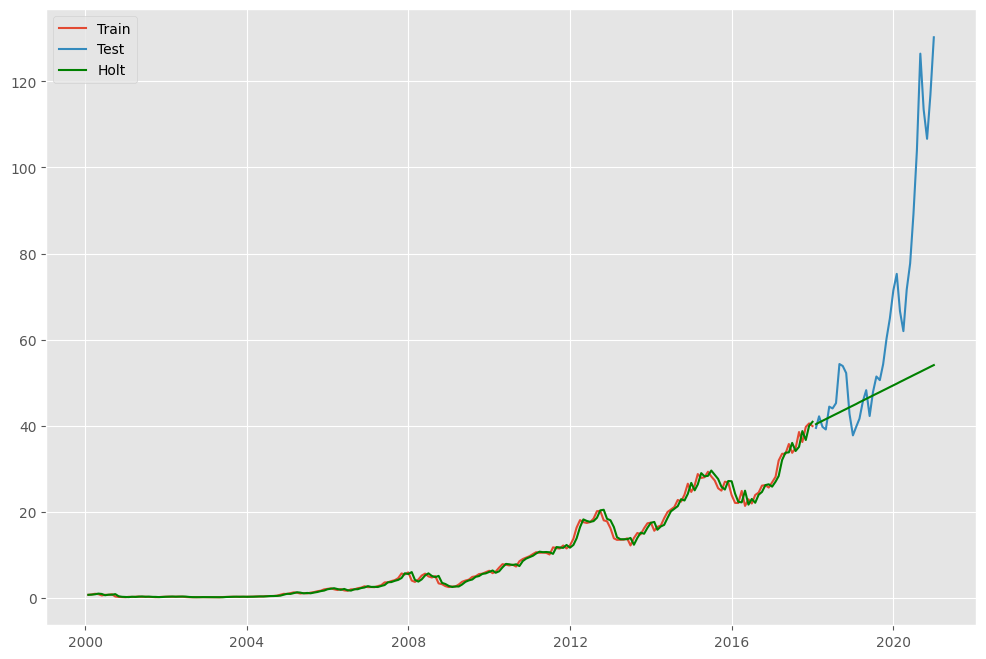

In [60]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = 'Train')
plt.plot(df_test, label = 'Test')

plt.plot(holt.fittedvalues, color = "g", label = "Holt")
plt.plot(holt_pred, color = "g")

plt.legend()
plt.plot()

[]

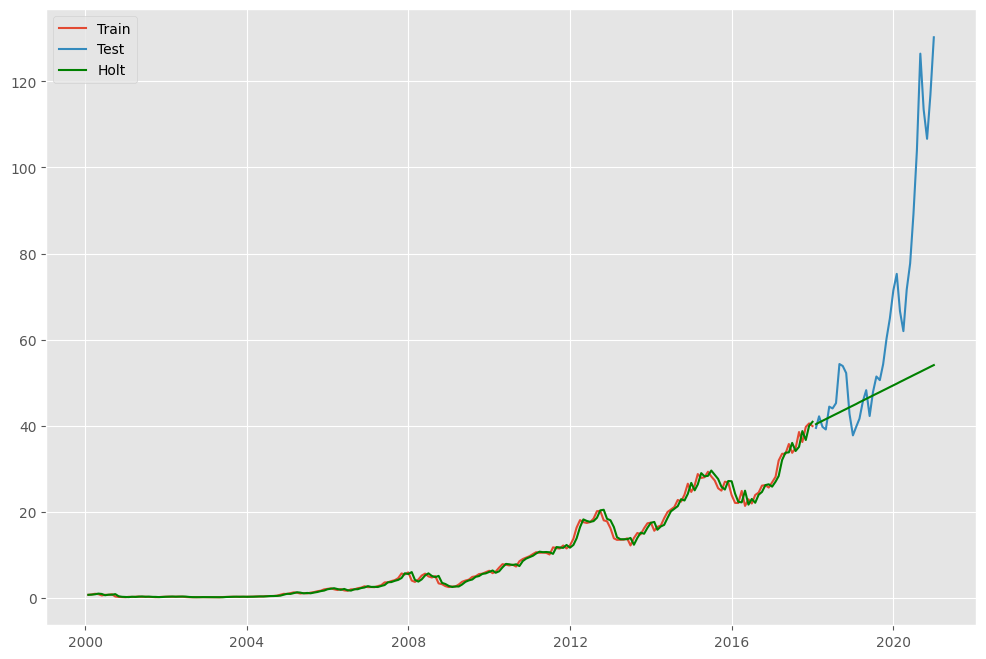

In [61]:
holt_sml = Holt(df_train, initialization_method = 'estimated').fit(smoothing_level = 0.8)
holt_sml_pred = holt_sml.forecast(df_test.shape[0])

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = 'Train')
plt.plot(df_test, label = 'Test')

plt.plot(holt.fittedvalues, color = "g", label = "Holt")
plt.plot(holt_pred, color = "g")

plt.legend()
plt.plot()

### Holt-Winter

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing

In [63]:
n_season = 12

exp_add = ExponentialSmoothing(df_train, trend = 'add', seasonal = 'add', initialization_method = 'estimated').fit()
exp_add

In [64]:
exp_add_pred = exp_add.forecast(df_test.shape[0])
exp_add_pred

2018-01-31    40.031613
2018-02-28    40.826213
2018-03-31    41.489913
2018-04-30    41.755103
2018-05-31    42.398787
2018-06-30    42.303716
2018-07-31    42.990508
2018-08-31    43.633437
2018-09-30    43.773522
2018-10-31    44.514675
2018-11-30    44.942465
2018-12-31    44.929146
2019-01-31    44.988856
2019-02-28    45.783455
2019-03-31    46.447155
2019-04-30    46.712345
2019-05-31    47.356029
2019-06-30    47.260958
2019-07-31    47.947750
2019-08-31    48.590679
2019-09-30    48.730764
2019-10-31    49.471917
2019-11-30    49.899707
2019-12-31    49.886389
2020-01-31    49.946098
2020-02-29    50.740697
2020-03-31    51.404397
2020-04-30    51.669587
2020-05-31    52.313272
2020-06-30    52.218200
2020-07-31    52.904992
2020-08-31    53.547921
2020-09-30    53.688007
2020-10-31    54.429160
2020-11-30    54.856950
2020-12-31    54.843631
Freq: M, dtype: float64

In [65]:
exp_mul = ExponentialSmoothing(df_train, trend = 'mul', seasonal = 'mul', initialization_method = 'estimated').fit()
exp_mul_pred = exp_mul.forecast(df_test.shape[0])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [66]:
exp_mul

In [67]:
exp_mul_pred

2018-01-31    39.497956
2018-02-28    42.695731
2018-03-31    44.374858
2018-04-30    43.749694
2018-05-31    45.980706
2018-06-30    44.238495
2018-07-31    45.785598
2018-08-31    47.902181
2018-09-30    47.061619
2018-10-31    49.554491
2018-11-30    50.478410
2018-12-31    49.014234
2019-01-31    48.452843
2019-02-28    52.375610
2019-03-31    54.435425
2019-04-30    53.668525
2019-05-31    56.405347
2019-06-30    54.268146
2019-07-31    56.166005
2019-08-31    58.762454
2019-09-30    57.731322
2019-10-31    60.789372
2019-11-30    61.922760
2019-12-31    60.126629
2020-01-31    59.437961
2020-02-29    64.250089
2020-03-31    66.776900
2020-04-30    65.836130
2020-05-31    69.193438
2020-06-30    66.571696
2020-07-31    68.899833
2020-08-31    72.084944
2020-09-30    70.820035
2020-10-31    74.571399
2020-11-30    75.961746
2020-12-31    73.758402
Freq: M, dtype: float64

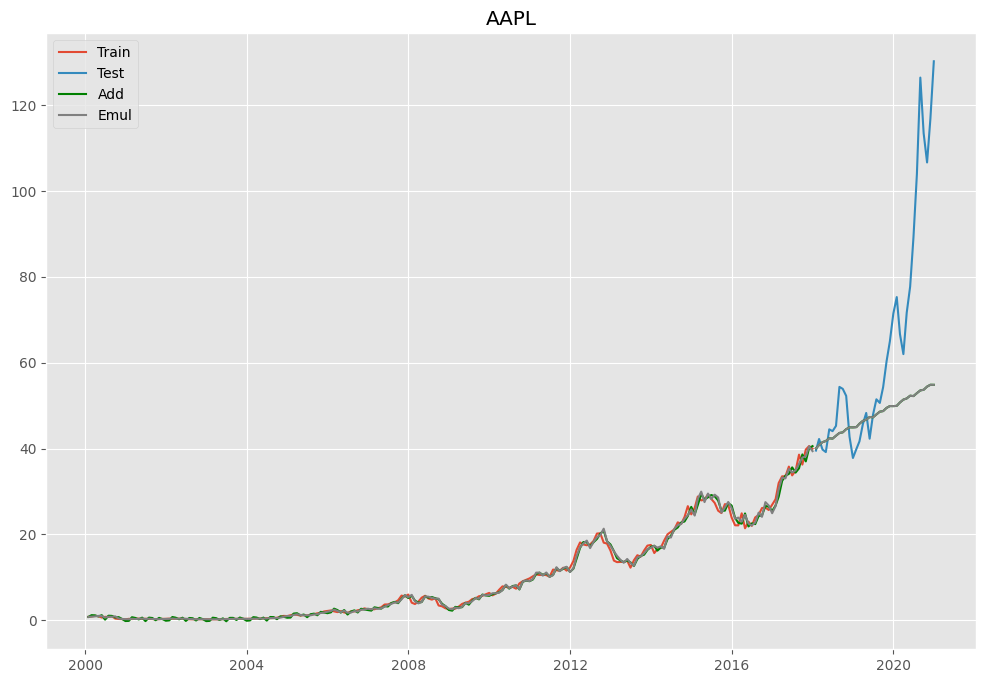

In [68]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = 'Train')
plt.plot(df_test, label = 'Test')

plt.plot(exp_add.fittedvalues, color = 'g', label = 'Add')
plt.plot(exp_add_pred, color = 'g')

plt.plot(exp_mul.fittedvalues, color = 'grey', label = 'Emul')
plt.plot(exp_add_pred, color = 'grey')

plt.title(f"{symbol}")
plt.legend()
plt.show()

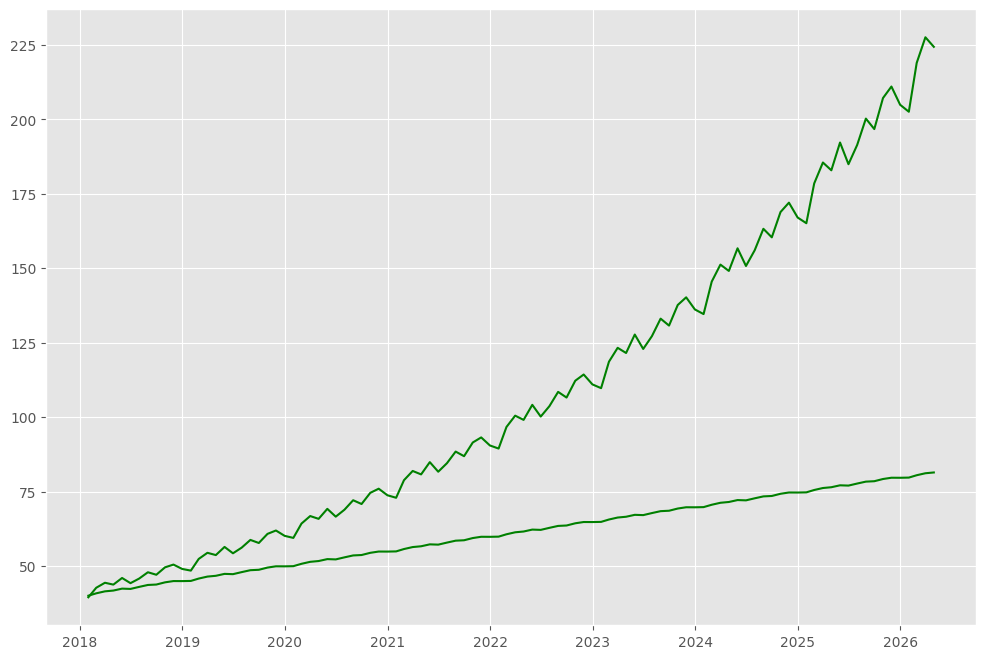

In [69]:
plt.plot(exp_add.forecast(100), color = 'g')
plt.plot(exp_mul.forecast(100), color = 'g')